In [1]:
import pandas as pd
import os

In [2]:
out_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation"

In [3]:
df = pd.read_csv(os.path.join(out_dir, "all_models_metrics.csv"))

In [4]:
df["model"].unique()


array(['id', 'cf', 'same_timepoint', 'same_perturbation'], dtype=object)

In [5]:
df['cell_type_accuracy'] = (2-df['cell_type_fraction_error'])/2

In [6]:
df.groupby("model")['cell_type_accuracy'].mean()

model
cf                   0.888987
id                   0.850254
same_perturbation    0.653641
same_timepoint       0.850254
Name: cell_type_accuracy, dtype: float64

In [7]:
df.groupby("model")['ood_e_distance'].mean()

model
cf                    7.492472
id                   17.762491
same_perturbation    69.863889
same_timepoint       14.737535
Name: ood_e_distance, dtype: float64

In [11]:
df = pd.read_csv("/lustre/groups/ml01/workspace/cell_flow_zebrafish/results/single_condition/cell_type_proportion_downstream/corrs_cell_types.csv", index_col=0)

In [13]:
df[df["method"]=="cellflow"]["pearson"].mean()

0.4298190765585839

In [49]:
df = df[df["model"].isin(("same_timepoint", "cf"))]

In [50]:
df = df[[el for el in df.columns if el.startswith("e_distance")]+["condition", "model"]]

In [51]:
df = df.rename(columns={col: "_".join(col.split("_")[2:]) for col in df.columns if col not in ("condition", "model")})

In [52]:
df

,periderm,mature fast muscle,neural progenitor (hindbrain),connective tissue-meninges-dermal FB,mature slow muscle,head/eye connective tissue,neural progenitor (hindbrain R7/8),"eye, optic cup",neural progenitor (MHB),pharyngeal arch (NC-derived),...,dorsal spinal cord neuron,KA neuron,osteoblast,satellite cells,primordial germ cell,pharynx,hypochord,hypophysis/locus coeruleus,condition,model
71,1.527687,4.035821,0.966347,4.806410,4.548341,4.205180,3.523481,2.376383,1.989199,2.891809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,zc4h2_control_24,cf
72,23.582327,1.707897,NaN,9.578211,2.825160,11.683070,8.756108,2.801886,4.144154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,met_control_36,cf
73,78.687670,8.903719,NaN,18.470795,57.245964,NaN,NaN,22.665544,16.550244,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tfap2a_control_72,cf
74,78.091063,16.542878,NaN,29.006606,21.196028,27.530168,69.967095,27.809071,16.359586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hgfa_control_48,cf
75,7.698100,10.025645,NaN,15.451032,7.530200,NaN,NaN,6.383864,6.490332,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tfap2a_foxd3_72,cf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,23.783049,516.469604,7.148375,24.461726,142.084437,7.787654,17.333901,12.342956,11.538534,9.643218,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbx16_msgn1_18,same_timepoint
209,39.053874,30.164843,27.137687,46.825171,35.326976,35.352261,32.311120,34.860777,34.020076,43.273221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,epha4a_control_18,same_timepoint
210,40.828807,NaN,6.171877,14.931889,201.832259,13.903529,13.902382,12.589788,7.937665,13.729890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbxta_control_18,same_timepoint
211,36.548811,20.231260,24.821718,22.774900,12.707822,16.564507,16.546956,42.279166,34.925576,NaN,...,NaN,17.708225,NaN,NaN,NaN,NaN,NaN,NaN,hoxb1a_control_36,same_timepoint


In [53]:
df.index = df["condition"]

In [54]:
df = pd.melt(df, id_vars=["condition", "model"], value_vars=None)

In [55]:
df

,condition,model,variable,value
0,zc4h2_control_24,cf,periderm,1.527687
1,met_control_36,cf,periderm,23.582327
2,tfap2a_control_72,cf,periderm,78.687670
3,hgfa_control_48,cf,periderm,78.091063
4,tfap2a_foxd3_72,cf,periderm,7.698100
...,...,...,...,...
13201,tbx16_msgn1_18,same_timepoint,hypophysis/locus coeruleus,NaN
13202,epha4a_control_18,same_timepoint,hypophysis/locus coeruleus,NaN
13203,tbxta_control_18,same_timepoint,hypophysis/locus coeruleus,NaN
13204,hoxb1a_control_36,same_timepoint,hypophysis/locus coeruleus,NaN


In [59]:
df["timepoint"] = df.apply(lambda x: x["condition"].split("_")[-1], axis=1)
df["gene_target"] = df.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'zc4h2_control'),
  Text(1, 0, 'met_control'),
  Text(2, 0, 'tfap2a_control'),
  Text(3, 0, 'hgfa_control'),
  Text(4, 0, 'tfap2a_foxd3'),
  Text(5, 0, 'noto_control'),
  Text(6, 0, 'cdx4_cdx1a'),
  Text(7, 0, 'epha4a_control'),
  Text(8, 0, 'mafba_control'),
  Text(9, 0, 'tbx16_msgn1'),
  Text(10, 0, 'smo_control'),
  Text(11, 0, 'hand2_control'),
  Text(12, 0, 'egr2b_control'),
  Text(13, 0, 'cdx4_control'),
  Text(14, 0, 'foxi1_control'),
  Text(15, 0, 'hoxb1a_control'),
  Text(16, 0, 'tbx16_tbx16l'),
  Text(17, 0, 'tbx16_control'),
  Text(18, 0, 'tbx1_control'),
  Text(19, 0, 'wnt3a_wnt8'),
  Text(20, 0, 'phox2a_control'),
  Text(21, 0, 'foxd3_control'),
  Text(22, 0, 'tbxta_control')])

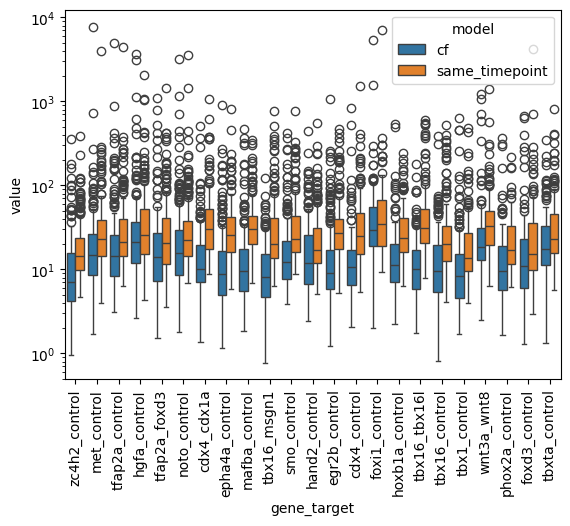

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(df, x="gene_target", y="value", hue="model")
plt.yscale("log")
plt.xticks(rotation=90) 

In [79]:
df = pd.read_csv(os.path.join(out_dir, "all_models_metrics.csv"), index_col=0)

In [80]:
df

,fraction_cell_types_covered,cell_type_fraction_error,mean_r_sq_per_cell_type,mean_e_distance_per_cell_type,mean_mmd_per_cell_type,mean_sdiv_10_per_cell_type,mean_sdiv_100_per_cell_type,median_r_sq_per_cell_type,median_e_distance_per_cell_type,median_mmd_per_cell_type,...,e_distance_hypochord,mmd_hypochord,div_10_hypochord,div_100_hypochord,r_squared_hypophysis/locus coeruleus,e_distance_hypophysis/locus coeruleus,mmd_hypophysis/locus coeruleus,div_10_hypophysis/locus coeruleus,div_100_hypophysis/locus coeruleus,model
zc4h2_control_24,1.000000,0.198075,0.997143,17.884346,0.007304,176.589351,50.130940,0.998086,10.724632,0.006735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id
met_control_36,1.000000,0.290707,0.996653,21.373934,0.007520,196.086758,64.315720,0.997639,15.631581,0.006816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id
tfap2a_control_72,1.000000,0.321600,0.979980,127.018322,0.009210,338.764505,212.046395,0.996153,24.456763,0.007337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id
hgfa_control_48,1.000000,0.348580,0.990385,55.715163,0.012429,239.495950,99.938459,0.993441,34.930590,0.011155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id
tfap2a_foxd3_72,1.000000,0.229467,0.988895,92.352286,0.009099,292.229661,157.077969,0.994277,32.852069,0.007775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,id
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tbx16_msgn1_18,0.980392,1.212608,0.905757,670.869803,0.085333,641.264298,498.944824,0.962890,189.332841,0.042688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,same_perturbation
epha4a_control_18,0.981132,0.929087,0.948681,293.535101,0.079728,398.331853,260.191940,0.976612,126.925812,0.031510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,same_perturbation
tbxta_control_18,1.000000,0.524250,0.952553,417.940246,0.026617,438.654073,302.082660,0.984620,82.465755,0.022917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,same_perturbation
hoxb1a_control_36,1.000000,0.715763,0.967686,184.243108,0.031402,316.953292,184.068722,0.981734,117.337141,0.023526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,same_perturbation


In [81]:
df_id = df[df["model"]=="id"]
df_tp = df[df["model"]=="same_timepoint"]
df_cf = df[df["model"]=="cf"]

In [82]:
df_id_e_dist = np.log2(df_id[[el for el in df_id.columns if el.startswith("e_distance")]])
df_tp_e_dist = np.log2(df_tp[[el for el in df_tp.columns if el.startswith("e_distance")]])
df_cf_e_dist = np.log2(df_cf[[el for el in df_cf.columns if el.startswith("e_distance")]])

df_diff_e_dist = df_tp_e_dist - df_cf_e_dist
df_diff_e_dist["condition"] = df_diff_e_dist.index

df_diff_e_dist = pd.melt(df_diff_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["condition"] = df_id_e_dist.index
df_id_e_dist = pd.melt(df_id_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["perturbation_effect"] = df_id_e_dist["value"]
df_id_e_dist=df_id_e_dist.drop(columns=["value"])

df_merged = pd.merge(df_diff_e_dist, df_id_e_dist, left_on=["condition", "variable"], right_on=["condition", "variable"], suffixes=(None, None))
df_merged["cell_type"] = df_merged.apply(lambda x: "_".join(x["variable"].split("_")[1:]), axis=1)

df_merged["timepoint"] = df_merged.apply(lambda x: x["condition"].split("_")[-1], axis=1)
df_merged["gene_target"] = df_merged.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)

In [100]:
df_id_e_dist = np.log2(df_id[[el for el in df_id.columns if el.startswith("e_distance")]])
df_tp_e_dist = np.log2(df_tp[[el for el in df_tp.columns if el.startswith("e_distance")]])
df_cf_e_dist = np.log2(df_cf[[el for el in df_cf.columns if el.startswith("e_distance")]])

df_diff_e_dist = df_tp_e_dist - df_cf_e_dist
df_diff_e_dist["condition"] = df_diff_e_dist.index

df_diff_e_dist = pd.melt(df_diff_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["condition"] = df_id_e_dist.index
df_id_e_dist = pd.melt(df_id_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["perturbation_effect"] = df_id_e_dist["value"]
df_id_e_dist=df_id_e_dist.drop(columns=["value"])

In [101]:
df_id_e_dist

,condition,variable,perturbation_effect
0,zc4h2_control_24,e_distance_periderm,4.197768
1,met_control_36,e_distance_periderm,4.881791
2,tfap2a_control_72,e_distance_periderm,6.915538
3,hgfa_control_48,e_distance_periderm,5.845730
4,tfap2a_foxd3_72,e_distance_periderm,5.502989
...,...,...,...
6598,tbx16_msgn1_18,e_distance_hypophysis/locus coeruleus,NaN
6599,epha4a_control_18,e_distance_hypophysis/locus coeruleus,NaN
6600,tbxta_control_18,e_distance_hypophysis/locus coeruleus,NaN
6601,hoxb1a_control_36,e_distance_hypophysis/locus coeruleus,NaN


In [102]:
df_id_e_dist = np.log2(df_id[[el for el in df_id.columns if el.startswith("e_distance")]])
df_tp_e_dist = np.log2(df_tp[[el for el in df_tp.columns if el.startswith("e_distance")]])
df_cf_e_dist = np.log2(df_cf[[el for el in df_cf.columns if el.startswith("e_distance")]])

df_diff_e_dist = df_tp_e_dist - df_cf_e_dist
df_diff_e_dist["condition"] = df_diff_e_dist.index

df_diff_e_dist = pd.melt(df_diff_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["condition"] = df_id_e_dist.index
df_id_e_dist = pd.melt(df_id_e_dist, id_vars=["condition"], value_vars=None)

df_id_e_dist["perturbation_effect"] = df_id_e_dist["value"]
df_id_e_dist=df_id_e_dist.drop(columns=["value"])

df_merged = pd.merge(df_diff_e_dist, df_id_e_dist, left_on=["condition", "variable"], right_on=["condition", "variable"], suffixes=(None, None))
df_merged["cell_type"] = df_merged.apply(lambda x: "_".join(x["variable"].split("_")[1:]), axis=1)

df_merged["timepoint"] = df_merged.apply(lambda x: x["condition"].split("_")[-1], axis=1)
df_merged["gene_target"] = df_merged.apply(lambda x: "_".join(x["condition"].split("_")[:-1]), axis=1)